# 1D Exercises

## 1. Elliptic 1D Problems


### 1.1 Introduction

In M++ also some 1D Problems are implemented. 1D Problems are great for testing methods, as we know the exact solutions in many cases, since the Problem is just an ODE. An example is the "1D Laplace" problem, which is given just by
$ - u^{\prime \prime}(x) = 0 $.

In [1]:
import sys
sys.path.append('../..')

from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
import ipywidgets as widgets
import python.mppy as mppy
from plotting import *
import pandas as pd

mpp = mppy.Mpp(kernels=4,
               mute=False,
               executable='M++',
               project_name='tutorial',
               cmake_args = ['-DBUILD_TUTORIAL=ON'])

mpp.clean_data()
mpp.build()


================ running cmake ================

-- Option:     SPACE_DIM= 1   (using cached value)
-- Option:     BUILD_SPACETIME_TESTS= ON   (using cached value)
-- Option:     AFFINE_LINEAR_TRAFO= ON   (using cached value)
-- PROJECT_BINARY_DIR= /home/niklas/CLion/mpp/build
-- PROJECT_SOURCE_DIR= /home/niklas/CLion/mpp
-- PROJECT_MPP_DIR=    /home/niklas/CLion/mpp
-- Option:     BUILD_UQ= ON   (using cached value)
-- Option:     USE_FFTW= ON   (using cached value)
-- Option:     USE_SPLITTED_COMMS= ON   (using cached value)
-- Option:     AFFINE_LINEAR_TRAFO= ON   (using cached value)
-- Option:     BUILD_TUTORIAL= ON   (using cached value)
-- Option:     MPP_BUILD_TYPE= MppDebugFast   (using cached value)
-- Option:     DEBUG_LEVEL= 1   (using cached value)
-- Option:     CPP_VERSION= 20   (using cached value)
-- Option:     CMAKE_CXX_STANDARD=    (using cached value)
-- Option:     CPP_COMPILER_TYPE= c++   (using cached value)
-- Option:     SUPPRESS_WARNINGS= OFF   (using cached

Consolidate compiler generated dependencies of target TestRVector
Consolidate compiler generated dependencies of target TestSymRMatrix
Consolidate compiler generated dependencies of target TestCVector
Consolidate compiler generated dependencies of target TestAntisymRMatrix
[ 87%] Built target TestRVector
[ 87%] Built target TestSymRMatrix
[ 87%] Built target TestAntisymRMatrix
[ 87%] Built target TestCVector
Consolidate compiler generated dependencies of target TestHermCMatrix
Consolidate compiler generated dependencies of target TestCMatrix
Consolidate compiler generated dependencies of target TestRMatrix
Consolidate compiler generated dependencies of target TestCholesky
[ 87%] Built target TestRMatrix
[ 87%] Built target TestHermCMatrix
[ 87%] Built target TestCMatrix
[ 87%] Built target TestCholesky
Consolidate compiler generated dependencies of target TestMatrixExp
Consolidate compiler generated dependencies of target TestCTensor
Consolidate compiler generated dependencies of targe

0

In [2]:
mpp.run(1, config="TUT_laplace", kwargs={"Problem": "Laplace1D"})


================ running  mpp ================

start program on 1 procs at Mon Jan  1 21:38:53 2024
Running on: computer-niklas
   Config Info:
     AssembleVerbose: ......................... 1
     BaseEpsilon: ............................. 1e-8
     BasePreconditioner: ...................... Jacobi
     BaseReduction: ........................... 1e-20
     BaseSolver: .............................. GMRES
     BaseVerbose: ............................. 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     ElementPool: ............................. false
     FMLinearEpsilon: ......................... 1e-8
     FMLinearPreconditioner: .................. Jacobi
     FMLinearPrintSteps: ...................... 1
     FMLinearReduction: ....................... 1e-20
     level: ................................... 2
     LinearEpsilon: ........................... 1e-8
     LinearPrintS

0

As in the 2D case M++ provides some tools for simple 1D plot generation. 

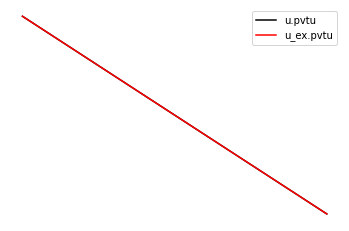

In [3]:
p = mpp.vtu_plot()
p.add_1d_vtu('u.pvtu', cell_data=False) 
p.add_1d_vtu('u_ex.pvtu', color='red', cell_data=False)
plt.legend()

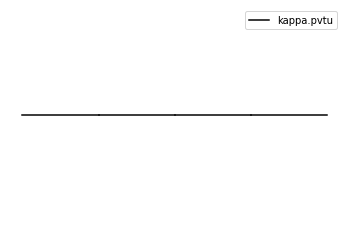

In [4]:
p = mpp.vtu_plot()
p.add_1d_vtu('kappa.pvtu') 
plt.legend()

In plotting.py a 

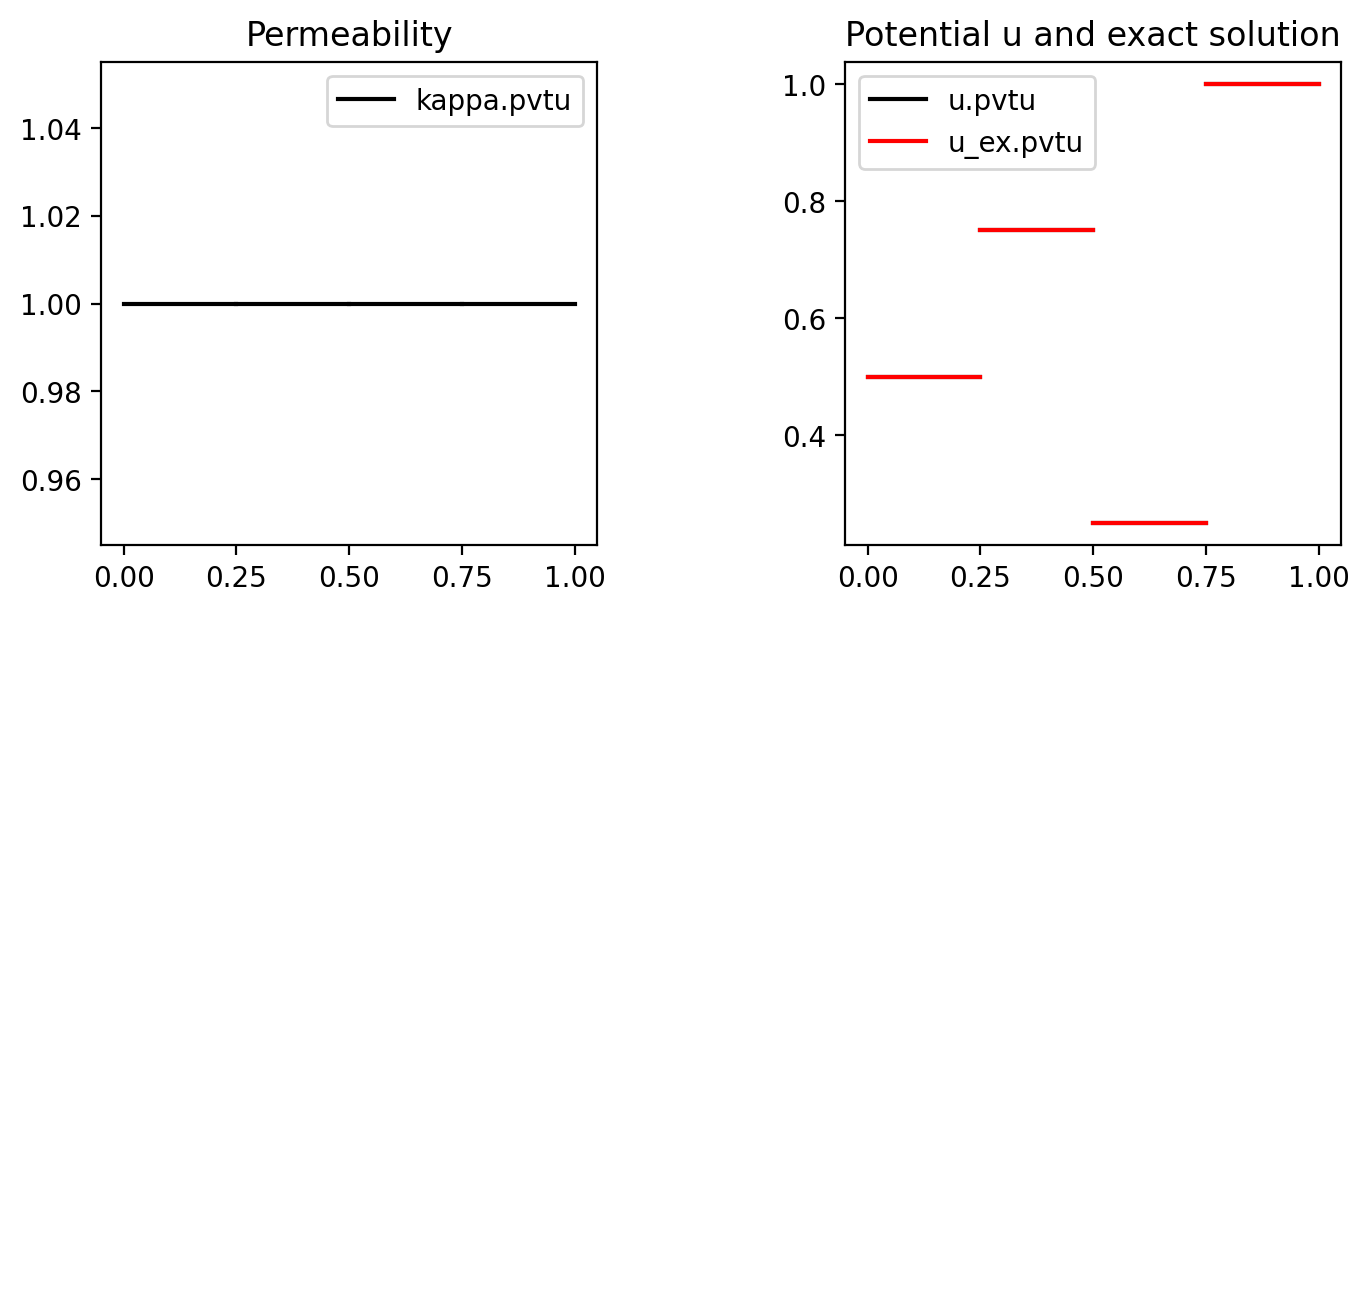

In [5]:
summarize_plot_1d(mpp, exact_solution="u_ex.pvtu")

### 1.2 Problem Discontinuous 1D

As in the two-dimensional case we can look at the same Problem with a discontinuous permeability by using Problem=Discontinuous1D. The Permability is given by 
$ \kappa(x) = 
            \begin{cases}
                10 \ , \quad \text{für } x \in [0.3,0.7] \\
                1 \ \ , \quad \text{sonst}
            \end{cases}$.

In [6]:
mpp.run(1, config="TUT_laplace", kwargs={"Problem": "Discontinuous1D"})


================ running  mpp ================

start program on 1 procs at Mon Jan  1 21:38:53 2024
Running on: computer-niklas
   Config Info:
     AssembleVerbose: ......................... 1
     BaseEpsilon: ............................. 1e-8
     BasePreconditioner: ...................... Jacobi
     BaseReduction: ........................... 1e-20
     BaseSolver: .............................. GMRES
     BaseVerbose: ............................. 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     ElementPool: ............................. false
     FMLinearEpsilon: ......................... 1e-8
     FMLinearPreconditioner: .................. Jacobi
     FMLinearPrintSteps: ...................... 1
     FMLinearReduction: ....................... 1e-20
     level: ................................... 2
     LinearEpsilon: ........................... 1e-8
     LinearPrintS

0

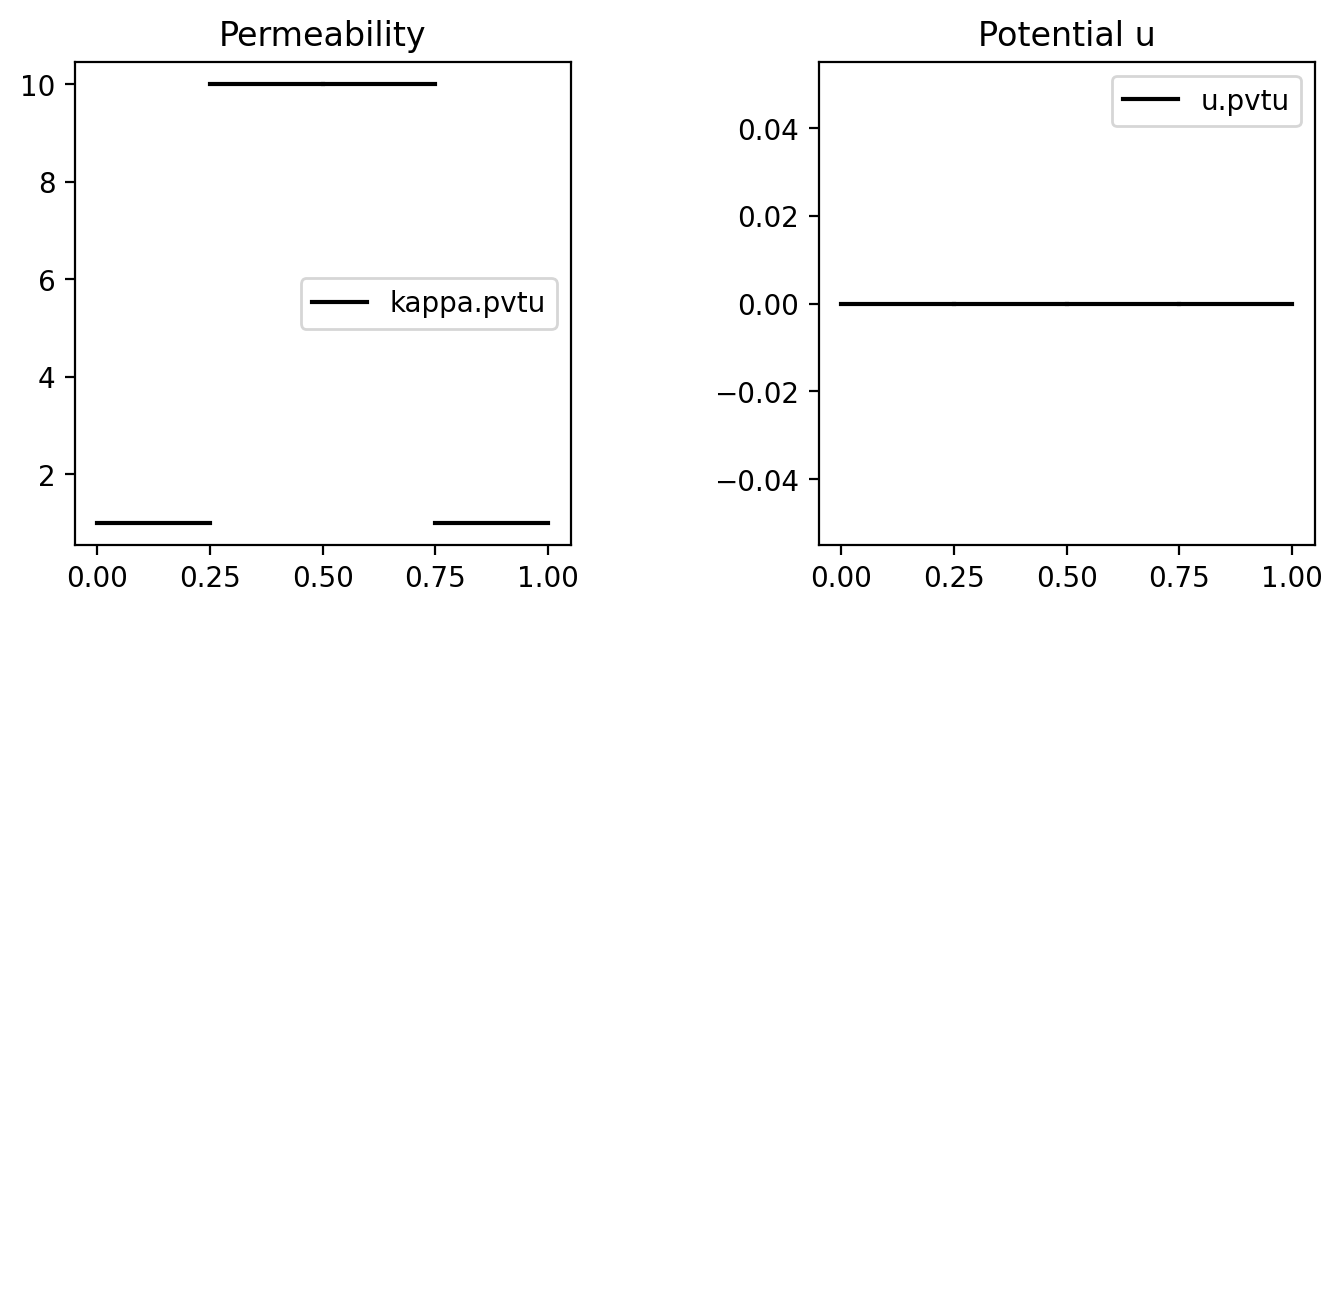

In [7]:
summarize_plot_1d(mpp)

### 1.3  Lagrange Finite Elements

In [8]:
columns = [
    "Mesh Info.Level",
    "Config Info.Problem",
    "Mixed Info.Calculated Inflow",
    "Mixed Info.Calculated Outflow",
    "Mixed Info.Flux Loss",
    "Exact Solution Info.Flux Error"
]

for problem in ["Laplace1D", "Discontinuous1D"]:
    for level in range(3, 7):
        kwargs = {"Problem": problem, "level": level}
        mpp.run(1, config="TUT_laplace", kwargs=kwargs)
        mpp.parse_json()
        
pd.DataFrame(pd.json_normalize(mpp.data), columns=columns)


================ running  mpp ================

start program on 1 procs at Mon Jan  1 21:38:54 2024
Running on: computer-niklas
   Config Info:
     AssembleVerbose: ......................... 1
     BaseEpsilon: ............................. 1e-8
     BasePreconditioner: ...................... Jacobi
     BaseReduction: ........................... 1e-20
     BaseSolver: .............................. GMRES
     BaseVerbose: ............................. 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     ElementPool: ............................. false
     FMLinearEpsilon: ......................... 1e-8
     FMLinearPreconditioner: .................. Jacobi
     FMLinearPrintSteps: ...................... 1
     FMLinearReduction: ....................... 1e-20
     level: ................................... 3
     LinearEpsilon: ........................... 1e-8
     LinearPrintS

start program on 1 procs at Mon Jan  1 21:38:54 2024
Running on: computer-niklas
   Config Info:
     AssembleVerbose: ......................... 1
     BaseEpsilon: ............................. 1e-8
     BasePreconditioner: ...................... Jacobi
     BaseReduction: ........................... 1e-20
     BaseSolver: .............................. GMRES
     BaseVerbose: ............................. 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     ElementPool: ............................. false
     FMLinearEpsilon: ......................... 1e-8
     FMLinearPreconditioner: .................. Jacobi
     FMLinearPrintSteps: ...................... 1
     FMLinearReduction: ....................... 1e-20
     level: ................................... 5
     LinearEpsilon: ........................... 1e-8
     LinearPrintSteps: ........................ 100
     LinearRed

start program on 1 procs at Mon Jan  1 21:38:55 2024
Running on: computer-niklas
   Config Info:
     AssembleVerbose: ......................... 1
     BaseEpsilon: ............................. 1e-8
     BasePreconditioner: ...................... Jacobi
     BaseReduction: ........................... 1e-20
     BaseSolver: .............................. GMRES
     BaseVerbose: ............................. 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     ElementPool: ............................. false
     FMLinearEpsilon: ......................... 1e-8
     FMLinearPreconditioner: .................. Jacobi
     FMLinearPrintSteps: ...................... 1
     FMLinearReduction: ....................... 1e-20
     level: ................................... 3
     LinearEpsilon: ........................... 1e-8
     LinearPrintSteps: ........................ 100
     LinearRed

start program on 1 procs at Mon Jan  1 21:38:56 2024
Running on: computer-niklas
   Config Info:
     AssembleVerbose: ......................... 1
     BaseEpsilon: ............................. 1e-8
     BasePreconditioner: ...................... Jacobi
     BaseReduction: ........................... 1e-20
     BaseSolver: .............................. GMRES
     BaseVerbose: ............................. 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     ElementPool: ............................. false
     FMLinearEpsilon: ......................... 1e-8
     FMLinearPreconditioner: .................. Jacobi
     FMLinearPrintSteps: ...................... 1
     FMLinearReduction: ....................... 1e-20
     level: ................................... 6
     LinearEpsilon: ........................... 1e-8
     LinearPrintSteps: ........................ 100
     LinearRed

,Mesh Info.Level,Config Info.Problem,Mixed Info.Calculated Inflow,Mixed Info.Calculated Outflow,Mixed Info.Flux Loss,Exact Solution Info.Flux Error
0,"[3, -1, 0, 0]",Laplace1D,-1.0,1.0,-2.220446e-16,0.0
1,"[4, -1, 0, 0]",Laplace1D,-1.0,1.0,-6.661338e-16,0.0
2,"[5, -1, 0, 0]",Laplace1D,-1.0,1.0,6.217249e-15,0.0
3,"[6, -1, 0, 0]",Laplace1D,-1.0,1.0,3.097522e-14,0.0
4,"[3, -1, 0, 0]",Discontinuous1D,0.0,0.0,0.000000e+00,NaN
5,"[4, -1, 0, 0]",Discontinuous1D,0.0,0.0,0.000000e+00,NaN
6,"[5, -1, 0, 0]",Discontinuous1D,0.0,0.0,0.000000e+00,NaN
7,"[6, -1, 0, 0]",Discontinuous1D,0.0,0.0,0.000000e+00,NaN


### 1.4 Preconditioners and linear solvers

In [9]:
mpp.reset_data()

lin_solver = ["GMRES","CG"]
preconditioner = ["Jacobi","SSOR","GaussSeidel","Multigrid"]

kwargs = {"Problem":"Laplace1D","level": 6, 
          "LinearSteps": 800, "LinearVerbose": 1,
          "plevel": 2, "BasePreconditioner": "PS"}

columns = [
    "Mesh Info.Level",
    "Config Info.Problem",
    "Config Info.Preconditioner",
    "Config Info.LinearSolver", 
    "Config Info.LinearSteps",
    "Computation Time"
]

for linsol in lin_solver:
    kwargs["LinearSolver"] = linsol
    for prec in preconditioner:
        kwargs["Preconditioner"] = prec

        mpp.run(4, config="TUT_laplace", kwargs=kwargs)
        adds = {"Preconditioner":prec,
                "Linear Solver":linsol}
        mpp.parse_json()
    
pd.DataFrame(pd.json_normalize(mpp.data), columns=columns)


================ running  mpp ================

start program on 4 procs at Mon Jan  1 21:38:57 2024
Running on: computer-niklas
   Config Info:
     AssembleVerbose: ......................... 1
     BaseEpsilon: ............................. 1e-8
     BasePreconditioner: ...................... PS
     BaseReduction: ........................... 1e-20
     BaseSolver: .............................. GMRES
     BaseVerbose: ............................. 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     ElementPool: ............................. false
     FMLinearEpsilon: ......................... 1e-8
     FMLinearPreconditioner: .................. Jacobi
     FMLinearPrintSteps: ...................... 1
     FMLinearReduction: ....................... 1e-20
     level: ................................... 6
     LinearEpsilon: ........................... 1e-8
     LinearPrintSteps

start program on 4 procs at Mon Jan  1 21:38:57 2024
Running on: computer-niklas
   Config Info:
     AssembleVerbose: ......................... 1
     BaseEpsilon: ............................. 1e-8
     BasePreconditioner: ...................... PS
     BaseReduction: ........................... 1e-20
     BaseSolver: .............................. GMRES
     BaseVerbose: ............................. 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     ElementPool: ............................. false
     FMLinearEpsilon: ......................... 1e-8
     FMLinearPreconditioner: .................. Jacobi
     FMLinearPrintSteps: ...................... 1
     FMLinearReduction: ....................... 1e-20
     level: ................................... 6
     LinearEpsilon: ........................... 1e-8
     LinearPrintSteps: ........................ 100
     LinearReducti

start program on 4 procs at Mon Jan  1 21:38:58 2024
Running on: computer-niklas
   Config Info:
     AssembleVerbose: ......................... 1
     BaseEpsilon: ............................. 1e-8
     BasePreconditioner: ...................... PS
     BaseReduction: ........................... 1e-20
     BaseSolver: .............................. GMRES
     BaseVerbose: ............................. 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     ElementPool: ............................. false
     FMLinearEpsilon: ......................... 1e-8
     FMLinearPreconditioner: .................. Jacobi
     FMLinearPrintSteps: ...................... 1
     FMLinearReduction: ....................... 1e-20
     level: ................................... 6
     LinearEpsilon: ........................... 1e-8
     LinearPrintSteps: ........................ 100
     LinearReducti

start program on 4 procs at Mon Jan  1 21:38:59 2024
Running on: computer-niklas
   Config Info:
     AssembleVerbose: ......................... 1
     BaseEpsilon: ............................. 1e-8
     BasePreconditioner: ...................... PS
     BaseReduction: ........................... 1e-20
     BaseSolver: .............................. GMRES
     BaseVerbose: ............................. 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     ElementPool: ............................. false
     FMLinearEpsilon: ......................... 1e-8
     FMLinearPreconditioner: .................. Jacobi
     FMLinearPrintSteps: ...................... 1
     FMLinearReduction: ....................... 1e-20
     level: ................................... 6
     LinearEpsilon: ........................... 1e-8
     LinearPrintSteps: ........................ 100
     LinearReducti

start program on 4 procs at Mon Jan  1 21:38:59 2024
Running on: computer-niklas
   Config Info:
     AssembleVerbose: ......................... 1
     BaseEpsilon: ............................. 1e-8
     BasePreconditioner: ...................... PS
     BaseReduction: ........................... 1e-20
     BaseSolver: .............................. GMRES
     BaseVerbose: ............................. 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     ElementPool: ............................. false
     FMLinearEpsilon: ......................... 1e-8
     FMLinearPreconditioner: .................. Jacobi
     FMLinearPrintSteps: ...................... 1
     FMLinearReduction: ....................... 1e-20
     level: ................................... 6
     LinearEpsilon: ........................... 1e-8
     LinearPrintSteps: ........................ 100
     LinearReducti

,Mesh Info.Level,Config Info.Problem,Config Info.Preconditioner,Config Info.LinearSolver,Config Info.LinearSteps,Computation Time
0,"[6, -1, 0, 0]",Laplace1D,Jacobi,GMRES,800,NaN
1,"[6, -1, 0, 0]",Laplace1D,SSOR,GMRES,800,NaN
2,"[6, -1, 0, 0]",Laplace1D,GaussSeidel,GMRES,800,NaN
3,"[6, -1, 0, 0]",Laplace1D,Multigrid,GMRES,800,NaN
4,"[6, -1, 0, 0]",Laplace1D,Jacobi,CG,800,NaN
5,"[6, -1, 0, 0]",Laplace1D,SSOR,CG,800,NaN
6,"[6, -1, 0, 0]",Laplace1D,GaussSeidel,CG,800,NaN
7,"[6, -1, 0, 0]",Laplace1D,Multigrid,CG,800,NaN


### 1.5 Mixed Finite Elements

In [10]:
mpp.reset_data()

columns = [
    "Mesh Info.Level",
    "Config Info.Problem",
    "Mixed Info.Calculated Inflow",
    "Mixed Info.Calculated Outflow",
    "Mixed Info.Flux Loss",
    "Exact Solution Info.Flux Error"
]

for problem in ["Laplace1D", "Discontinuous1D"]:
    for level in range(3, 7):
        kwargs = {"Problem":problem, "level":level}
        mpp.run(1, config="TUT_mixed", kwargs=kwargs)
        mpp.parse_json()
        
pd.DataFrame(pd.json_normalize(mpp.data), columns=columns)


================ running  mpp ================

start program on 1 procs at Mon Jan  1 21:39:00 2024
Running on: computer-niklas
   Config Info:
     AssembleVerbose: ......................... 1
     BasePreconditioner: ...................... PS
     BaseSolver: .............................. LS
     BaseSolverVerbose: ....................... 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     DualPrimal: .............................. 1
     ElementPool: ............................. false
     level: ................................... 3
     LinearEpsilon: ........................... 1e-10
     LinearReduction: ......................... 1e-20
     LinearSolver: ............................ GMRES
     LinearSteps: ............................. 800
     LinearVerbose: ........................... 1
     MeshVerbose: ............................. 1
     Model: ....................

start program on 1 procs at Mon Jan  1 21:39:01 2024
Running on: computer-niklas
   Config Info:
     AssembleVerbose: ......................... 1
     BasePreconditioner: ...................... PS
     BaseSolver: .............................. LS
     BaseSolverVerbose: ....................... 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     DualPrimal: .............................. 1
     ElementPool: ............................. false
     level: ................................... 5
     LinearEpsilon: ........................... 1e-10
     LinearReduction: ......................... 1e-20
     LinearSolver: ............................ GMRES
     LinearSteps: ............................. 800
     LinearVerbose: ........................... 1
     MeshVerbose: ............................. 1
     Model: ................................... MixedElliptic
     MultigridVerbo

start program on 1 procs at Mon Jan  1 21:39:01 2024
Running on: computer-niklas
   Config Info:
     AssembleVerbose: ......................... 1
     BasePreconditioner: ...................... PS
     BaseSolver: .............................. LS
     BaseSolverVerbose: ....................... 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     DualPrimal: .............................. 1
     ElementPool: ............................. false
     level: ................................... 3
     LinearEpsilon: ........................... 1e-10
     LinearReduction: ......................... 1e-20
     LinearSolver: ............................ GMRES
     LinearSteps: ............................. 800
     LinearVerbose: ........................... 1
     MeshVerbose: ............................. 1
     Model: ................................... MixedElliptic
     MultigridVerbo

start program on 1 procs at Mon Jan  1 21:39:02 2024
Running on: computer-niklas
   Config Info:
     AssembleVerbose: ......................... 1
     BasePreconditioner: ...................... PS
     BaseSolver: .............................. LS
     BaseSolverVerbose: ....................... 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     DualPrimal: .............................. 1
     ElementPool: ............................. false
     level: ................................... 6
     LinearEpsilon: ........................... 1e-10
     LinearReduction: ......................... 1e-20
     LinearSolver: ............................ GMRES
     LinearSteps: ............................. 800
     LinearVerbose: ........................... 1
     MeshVerbose: ............................. 1
     Model: ................................... MixedElliptic
     MultigridVerbo

,Mesh Info.Level,Config Info.Problem,Mixed Info.Calculated Inflow,Mixed Info.Calculated Outflow,Mixed Info.Flux Loss,Exact Solution Info.Flux Error
0,"[3, -1, 0, 0]",Laplace1D,-1.0,1.0,0.0,0.0
1,"[4, -1, 0, 0]",Laplace1D,-1.0,1.0,0.0,0.0
2,"[5, -1, 0, 0]",Laplace1D,-1.0,1.0,0.0,0.0
3,"[6, -1, 0, 0]",Laplace1D,-1.0,1.0,0.0,0.0
4,"[3, -1, 0, 0]",Discontinuous1D,0.0,0.0,0.0,NaN
5,"[4, -1, 0, 0]",Discontinuous1D,0.0,0.0,0.0,NaN
6,"[5, -1, 0, 0]",Discontinuous1D,0.0,0.0,0.0,NaN
7,"[6, -1, 0, 0]",Discontinuous1D,0.0,0.0,0.0,NaN


In [11]:
mpp.reset_data()

columns = [
    "Assemble Info.Assemble Name", 
    "Mesh Info.Level", 
    "Config Info.Problem", 
    "Dual Primal Error Info.Dual Primal Error",
    "Computation Time"
]
adds = {"Method": "MixedElliptic"}

kwargs = {"Problem":"Laplace1D","level":9,"plevel":2}
mpp.run(4, config="TUT_mixed", kwargs=kwargs)
mpp.parse_json()

kwargs["Problem"] = "Discontinuous1D"
mpp.run(4, config="TUT_mixed", kwargs=kwargs)
mpp.parse_json()

pd.DataFrame(pd.json_normalize(mpp.data), columns=columns)


================ running  mpp ================

start program on 4 procs at Mon Jan  1 21:39:03 2024
Running on: computer-niklas
   Config Info:
     AssembleVerbose: ......................... 1
     BasePreconditioner: ...................... PS
     BaseSolver: .............................. LS
     BaseSolverVerbose: ....................... 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     DualPrimal: .............................. 1
     ElementPool: ............................. false
     level: ................................... 9
     LinearEpsilon: ........................... 1e-10
     LinearReduction: ......................... 1e-20
     LinearSolver: ............................ GMRES
     LinearSteps: ............................. 800
     LinearVerbose: ........................... 1
     MeshVerbose: ............................. 1
     Model: ....................

,Assemble Info.Assemble Name,Mesh Info.Level,Config Info.Problem,Dual Primal Error Info.Dual Primal Error,Computation Time
0,MixedEllipticAssemble,"[9, -1, 0, 0]",Laplace1D,1.016565e-11,NaN
1,MixedEllipticAssemble,"[9, -1, 0, 0]",Discontinuous1D,0.000000e+00,NaN


### 1.6 Hybrid Finite Elements

In [12]:
# Todo fix this cell; was already broken before PSE
#kwargs["Problem"] = "Laplace1D"
#kwargs["Model"] = "HybridElliptic"
#adds["Method"] = "HybridElliptic"

#mpp.run(4, config="mixed", kwargs=kwargs)
#mpp.parse_log(additional_entries=adds)

#kwargs["Problem"] = "Discontinuous1D"
#mpp.run(4, config="mixed", kwargs=kwargs)
#mpp.parse_log(additional_entries=adds)

#pd.DataFrame(mpp.data,columns=columns)

### 1.8 Testing with polynomials

In [13]:
mpp.mute = False
kwargs = {"Problem": "P0Test1D"}
mpp.run(1, config="TUT_laplace", kwargs=kwargs)


================ running  mpp ================

start program on 1 procs at Mon Jan  1 21:39:04 2024
Running on: computer-niklas
   Config Info:
     AssembleVerbose: ......................... 1
     BaseEpsilon: ............................. 1e-8
     BasePreconditioner: ...................... Jacobi
     BaseReduction: ........................... 1e-20
     BaseSolver: .............................. GMRES
     BaseVerbose: ............................. 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     ElementPool: ............................. false
     FMLinearEpsilon: ......................... 1e-8
     FMLinearPreconditioner: .................. Jacobi
     FMLinearPrintSteps: ...................... 1
     FMLinearReduction: ....................... 1e-20
     level: ................................... 2
     LinearEpsilon: ........................... 1e-8
     LinearPrintS

0

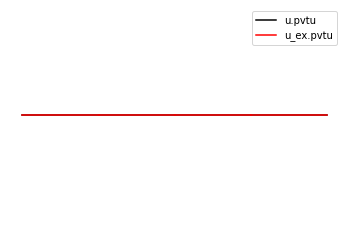

In [14]:
p = mpp.vtu_plot()
p.add_1d_vtu('u.pvtu') 
p.add_1d_vtu('u_ex.pvtu',color='red')
plt.legend()


================ running  mpp ================

start program on 1 procs at Mon Jan  1 21:39:04 2024
Running on: computer-niklas
   Config Info:
     AssembleVerbose: ......................... 1
     BaseEpsilon: ............................. 1e-8
     BasePreconditioner: ...................... Jacobi
     BaseReduction: ........................... 1e-20
     BaseSolver: .............................. GMRES
     BaseVerbose: ............................. 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     ElementPool: ............................. false
     FMLinearEpsilon: ......................... 1e-8
     FMLinearPreconditioner: .................. Jacobi
     FMLinearPrintSteps: ...................... 1
     FMLinearReduction: ....................... 1e-20
     level: ................................... 2
     LinearEpsilon: ........................... 1e-8
     LinearPrintS

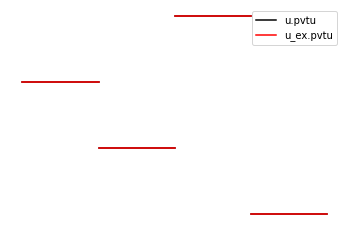

In [15]:
kwargs = {"Problem":"P1Test1D"}
mpp.run(1, config="TUT_laplace", kwargs=kwargs)

p = mpp.vtu_plot()
p.add_1d_vtu('u.pvtu') 
p.add_1d_vtu('u_ex.pvtu',color='red')
plt.legend()


================ running  mpp ================

start program on 1 procs at Mon Jan  1 21:39:04 2024
Running on: computer-niklas
   Config Info:
     AssembleVerbose: ......................... 1
     BasePreconditioner: ...................... PS
     BaseSolver: .............................. LS
     BaseSolverVerbose: ....................... 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     DualPrimal: .............................. 1
     ElementPool: ............................. false
     level: ................................... 2
     LinearEpsilon: ........................... 1e-10
     LinearReduction: ......................... 1e-20
     LinearSolver: ............................ GMRES
     LinearSteps: ............................. 800
     LinearVerbose: ........................... 1
     MeshVerbose: ............................. 1
     Model: ....................

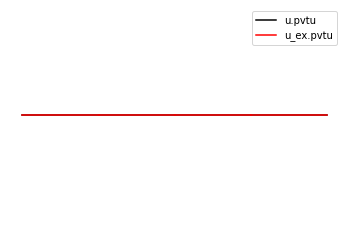

In [16]:
kwargs = {"Problem":"P1Test1D"}
mpp.run(1, config="TUT_mixed", kwargs=kwargs)

p = mpp.vtu_plot()
p.add_1d_vtu('u.pvtu') 
p.add_1d_vtu('u_ex.pvtu',color='red')
plt.legend()


================ running  mpp ================

start program on 1 procs at Mon Jan  1 21:39:05 2024
Running on: computer-niklas
   Config Info:
     AssembleVerbose: ......................... 1
     BasePreconditioner: ...................... PS
     BaseSolver: .............................. LS
     BaseSolverVerbose: ....................... 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     DualPrimal: .............................. 1
     ElementPool: ............................. false
     level: ................................... 2
     LinearEpsilon: ........................... 1e-10
     LinearReduction: ......................... 1e-20
     LinearSolver: ............................ GMRES
     LinearSteps: ............................. 800
     LinearVerbose: ........................... 1
     MeshVerbose: ............................. 1
     Model: ....................

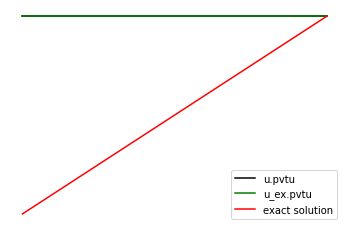

In [17]:
import numpy as np

kwargs = {"Problem":"P1Test1D"}
mpp.run(1, "TUT_mixed",{"Problem":"P1Test1D"})

p = mpp.vtu_plot()
p.add_1d_vtu('u.pvtu') 
p.add_1d_vtu('u_ex.pvtu',color='green')
x = np.linspace(0,1,10)
plt.plot(x,x,color='red',label='exact solution')
plt.legend()


================ running  mpp ================

start program on 1 procs at Mon Jan  1 21:39:05 2024
Running on: computer-niklas
   Config Info:
     AssembleVerbose: ......................... 1
     BaseEpsilon: ............................. 1e-8
     BasePreconditioner: ...................... Jacobi
     BaseReduction: ........................... 1e-20
     BaseSolver: .............................. GMRES
     BaseVerbose: ............................. 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     ElementPool: ............................. false
     FMLinearEpsilon: ......................... 1e-8
     FMLinearPreconditioner: .................. Jacobi
     FMLinearPrintSteps: ...................... 1
     FMLinearReduction: ....................... 1e-20
     level: ................................... 2
     LinearEpsilon: ........................... 1e-8
     LinearPrintS

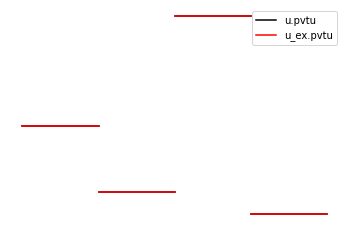

In [18]:
kwargs = {"Problem":"P2Test1D"}
mpp.run(1, config="TUT_laplace", kwargs=kwargs)

p = mpp.vtu_plot()
p.add_1d_vtu('u.pvtu') 
p.add_1d_vtu('u_ex.pvtu',color='red')
plt.legend()


================ running  mpp ================

start program on 1 procs at Mon Jan  1 21:39:06 2024
Running on: computer-niklas
   Config Info:
     AssembleVerbose: ......................... 1
     BaseEpsilon: ............................. 1e-8
     BasePreconditioner: ...................... Jacobi
     BaseReduction: ........................... 1e-20
     BaseSolver: .............................. GMRES
     BaseVerbose: ............................. 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     ElementPool: ............................. false
     FMLinearEpsilon: ......................... 1e-8
     FMLinearPreconditioner: .................. Jacobi
     FMLinearPrintSteps: ...................... 1
     FMLinearReduction: ....................... 1e-20
     level: ................................... 2
     LinearEpsilon: ........................... 1e-8
     LinearPrintS

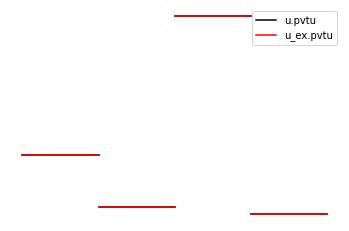

In [19]:
kwargs = {"Problem":"P3Test1D"}
mpp.run(1, config="TUT_laplace", kwargs=kwargs)

p = mpp.vtu_plot()
p.add_1d_vtu('u.pvtu') 
p.add_1d_vtu('u_ex.pvtu',color='red')
plt.legend()


================ running  mpp ================

start program on 1 procs at Mon Jan  1 21:39:06 2024
Running on: computer-niklas
   Config Info:
     AssembleVerbose: ......................... 1
     BaseEpsilon: ............................. 1e-8
     BasePreconditioner: ...................... Jacobi
     BaseReduction: ........................... 1e-20
     BaseSolver: .............................. GMRES
     BaseVerbose: ............................. 0
     ConfigVerbose: ........................... 1
     degree: .................................. 1
     Distribution: ............................ RCB
     ElementPool: ............................. false
     FMLinearEpsilon: ......................... 1e-8
     FMLinearPreconditioner: .................. Jacobi
     FMLinearPrintSteps: ...................... 1
     FMLinearReduction: ....................... 1e-20
     level: ................................... 2
     LinearEpsilon: ........................... 1e-8
     LinearPrintS

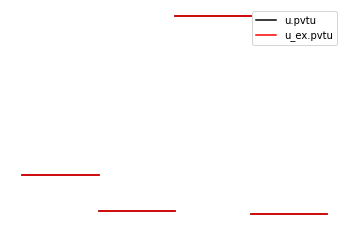

In [20]:
kwargs = {"Problem":"P4Test1D"}
mpp.run(1, config="TUT_laplace", kwargs = kwargs)

p = mpp.vtu_plot()
p.add_1d_vtu('u.pvtu') 
p.add_1d_vtu('u_ex.pvtu',color='red')
plt.legend()

## 2. Hyperbolic 1D Problems

### 2.1 Riemann Problem

In [21]:
mpp.run(2, config='TUT_riemann', kwargs={'Problem': 'Riemann1D', "level": 3})


================ running  mpp ================

start program on 2 procs at Mon Jan  1 21:39:06 2024
Running on: computer-niklas
   Config Info:
     AssembleVerbose: ......................... 1
     BaseSolverVerbose: ....................... -1
     ConfigVerbose: ........................... 1
     degree: .................................. 0
     Distribution: ............................ RCB
     dt: ...................................... 0.03125
     flux_alpha: .............................. 1
     gamma: ................................... 0.01
     Keps: .................................... 1e-5
     Kmax: .................................... 250
     level: ................................... 3
     LinearEpsilon: ........................... 1e-12
     LinearReduction: ......................... 1e-20
     LinearSolver: ............................ GMRES
     LinearSteps: ............................. 200
     LinearVerbose: ........................... -1
     MeshVerbose: ....

0

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


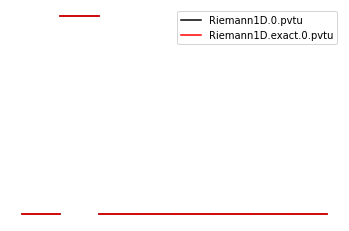

In [22]:
@interact(n=widgets.IntSlider(min=0, max=32, step=1, value=0))
def plot_i_frame(n):
    p = mpp.vtu_plot()
    p.add_1d_vtu("Riemann1D.{}.pvtu".format(n))
    p.add_1d_vtu("Riemann1D.exact.{}.pvtu".format(n), color='red')
    plt.legend()

In [23]:
mpp.reset_data()
columns = ["t","Mass","Energy"]

mpp.parse_log()
pd.DataFrame(mpp.data, columns=columns)

,t,Mass,Energy
0,"[0.0, 0.03125, 0.0625, 0.09375, 0.125, 0.15625...","[1.0, 1.0, 0.999995, 0.999968, 0.999866, 0.999...","[4.0, 2.57778, 1.86351, 1.47242, 1.23775, 1.08..."


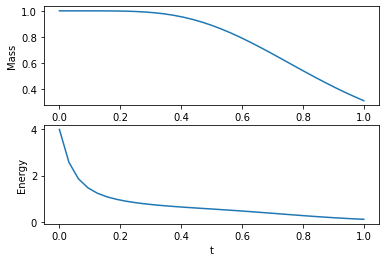

In [24]:
plt.subplot(211)

plt.plot(mpp.data['t'][-1],mpp.data['Mass'][-1])
plt.xlabel('t')
plt.ylabel('Mass')


plt.subplot(212)

plt.plot(mpp.data['t'][-1],mpp.data['Energy'][-1])
plt.xlabel('t')
plt.ylabel('Energy')

plt.show()